In [1]:
import pandas as pd
import numpy as np

#Accepting the input from the dataset and converting it into dataframes 
#Accepting the input from the dataset and converting it into dataframes 
df_rev1 = pd.read_fwf('BVCOEW.csv', encoding_errors='ignore')
df_rev2 = pd.read_fwf('BVCOEW_GoogleForm.csv', encoding_errors='ignore')
df_rev3 = pd.read_fwf('BVP_reviews.csv', encoding_errors='ignore')

#Naming the Columns
df_rev1.columns=['c'+str(i) for i in range(1, len(df_rev1.columns)+1)]
df_rev2.columns=['c'+str(i) for i in range(1, len(df_rev2.columns)+1)]
df_rev3.columns=['c'+str(i) for i in range(1, len(df_rev3.columns)+1)]

#Keeping only one column(data), while deleting the rest of the columns(empty)
df_rev1_new=pd.DataFrame().assign(c1=df_rev1['c1'])
df_rev2_new=pd.DataFrame().assign(c1=df_rev2['c1'])
df_rev3_new=pd.DataFrame().assign(c1=df_rev3['c1'])

#Checking for NaN data entries and removing them
df_rev1_new.isna().sum()
df_rev1_new=df_rev1_new.dropna()
df_rev1_new.isna().sum()
df_rev2_new.isna().sum()
df_rev2_new=df_rev2_new.dropna()
df_rev2_new.isna().sum()
df_rev3_new.isna().sum()
df_rev3_new=df_rev3_new.dropna()
df_rev3_new.isna().sum()


c1    0
dtype: int64

In [2]:
#!pip uninstall vaderSentiment --yes   (incase of faulty installation)

get_ipython().system('python -m pip install vaderSentiment --no-cache-dir')

#VADER (Valence Aware Dictionary and Sentiment Reasoner) is a rule-based sentiment analyzer that has been trained on social media text. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#creating object while polarity_score is a method that gives us the scores for pos, neg and neutral
sentiment = SentimentIntensityAnalyzer()

#creating 4 columns for different sentiments
df_rev1_new['sentiment_neg']=''
df_rev1_new['sentiment_pos']=''
df_rev1_new['sentiment_neu']=''
df_rev1_new['sentiment_compound']=''
df_rev2_new['sentiment_neg']=''
df_rev2_new['sentiment_pos']=''
df_rev2_new['sentiment_neu']=''
df_rev2_new['sentiment_compound']=''
df_rev3_new['sentiment_neg']=''
df_rev3_new['sentiment_pos']=''
df_rev3_new['sentiment_neu']=''
df_rev3_new['sentiment_compound']=''

#Creating final sentiment column
df_rev1_new['sentiment'] = ''
df_rev2_new['sentiment'] = ''
df_rev3_new['sentiment'] = ''



Defaulting to user installation because normal site-packages is not writeable


In [3]:
#Calculating the sentiment values and discerning the sentiment
count_row = df_rev1_new.shape[0]
for i in range(count_row):
  print(i,"  --  ",count_row)
  dic=sentiment.polarity_scores(df_rev1_new['c1'][i])
  value_neg = dic['neg']
  value_pos = dic['pos']
  value_neu = dic['neu']
  value_compound = dic['compound']
  df_rev1_new['sentiment_neg'][i]=value_neg
  df_rev1_new['sentiment_pos'][i]=value_pos
  df_rev1_new['sentiment_neu'][i]=value_neu
  df_rev1_new['sentiment_compound'][i]=value_compound
  if(df_rev1_new['sentiment_neg'][i] > df_rev1_new['sentiment_pos'][i]):
    df_rev1_new['sentiment'][i]='negative'
  elif(df_rev1_new['sentiment_pos'][i] > df_rev1_new['sentiment_neg'][i]):
    df_rev1_new['sentiment'][i]='positive'
  else:
    df_rev1_new['sentiment'][i]='neutral'
print("df_rev1_new")
df_rev1_new


count_row = df_rev2_new.shape[0]
for i in range(count_row):
  print(i,"  --  ",count_row)
  dic=sentiment.polarity_scores(df_rev2_new['c1'][i])
  value_neg = dic['neg']
  value_pos = dic['pos']
  value_neu = dic['neu']
  value_compound = dic['compound']
  df_rev2_new['sentiment_neg'][i]=value_neg
  df_rev2_new['sentiment_pos'][i]=value_pos
  df_rev2_new['sentiment_neu'][i]=value_neu
  df_rev2_new['sentiment_compound'][i]=value_compound
  if(df_rev2_new['sentiment_neg'][i] > df_rev2_new['sentiment_pos'][i]):
    df_rev2_new['sentiment'][i]='negative'
  elif(df_rev2_new['sentiment_pos'][i] > df_rev2_new['sentiment_neg'][i]):
    df_rev2_new['sentiment'][i]='positive'
  else:
    df_rev2_new['sentiment'][i]='neutral'
print("df_rev2_new")
df_rev2_new


count_row = df_rev3_new.shape[0]
for i in range(count_row):
  print(i,"  --  ",count_row)
  dic=sentiment.polarity_scores(df_rev3_new['c1'][i])
  value_neg = dic['neg']
  value_pos = dic['pos']
  value_neu = dic['neu']
  value_compound = dic['compound']
  df_rev3_new['sentiment_neg'][i]=value_neg
  df_rev3_new['sentiment_pos'][i]=value_pos
  df_rev3_new['sentiment_neu'][i]=value_neu
  df_rev3_new['sentiment_compound'][i]=value_compound
  if(df_rev3_new['sentiment_neg'][i] > df_rev3_new['sentiment_pos'][i]):
    df_rev3_new['sentiment'][i]='negative'
  elif(df_rev3_new['sentiment_pos'][i] > df_rev3_new['sentiment_neg'][i]):
    df_rev3_new['sentiment'][i]='positive'
  else:
    df_rev3_new['sentiment'][i]='neutral'
print("df_rev3_new")
df_rev3_new


#Combining all three dataframes into one common dataframe
frames=[df_rev1_new, df_rev2_new, df_rev3_new]
dfrev_final=pd.concat(frames)
dfrev_final

#Converting everything to lower case
dfrev_final['c1'] = dfrev_final['c1'].str.lower()


0   --   178
1   --   178
2   --   178
3   --   178
4   --   178
5   --   178
6   --   178
7   --   178
8   --   178
9   --   178
10   --   178
11   --   178
12   --   178
13   --   178
14   --   178
15   --   178
16   --   178
17   --   178
18   --   178
19   --   178
20   --   178
21   --   178
22   --   178
23   --   178
24   --   178
25   --   178
26   --   178
27   --   178
28   --   178
29   --   178
30   --   178
31   --   178
32   --   178
33   --   178
34   --   178
35   --   178
36   --   178
37   --   178
38   --   178
39   --   178
40   --   178
41   --   178
42   --   178
43   --   178
44   --   178
45   --   178
46   --   178
47   --   178
48   --   178
49   --   178
50   --   178
51   --   178
52   --   178
53   --   178
54   --   178
55   --   178
56   --   178
57   --   178
58   --   178
59   --   178
60   --   178
61   --   178
62   --   178
63   --   178
64   --   178
65   --   178
66   --   178
67   --   178
68   --   178
69   --   178
70   --   178
71   --   178
72

In [4]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

dfrev_final_without_sw=dfrev_final

#removing the stopwords
dfrev_final_without_sw['c1'] = dfrev_final['c1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#removing the commonly repeating words
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace(',','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('.','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('\'','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('"','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('good','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('film','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('movie','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('great','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('best','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('give','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('really','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('may','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('take','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('make','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('  ',' ')

common_words = ['date', 'month', 'year', ' year', 'NA', 'department', '  ', 'film', 'make','good', 'feel', 'movie ', 'best', 'give', 'really', 'may', 'take', 'make ' 'made', 'movie', 'one' ,'even', 'little', 'performance', 'made', 'watching', 'picture', 'day','much', 'lot', 'never', 'go', 'look', 'filmmaker', '"']
dfrev_final_without_sw['c1'] = dfrev_final_without_sw['c1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (common_words)]))

dfrev_final_without_sw

#Extracting csv file
dfrev_final_without_sw.to_csv('RottenOutputFinal.csv')

#Converting the columns without the stopwords to text
rev_text_final=' '.join(dfrev_final_without_sw['c1'].tolist())
rev_text_final

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mital\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'various internet service provider 1) reliance: 4 mbps 2) bsnl: 12 mbps wi-fi wireless access point separate generator setup: 125 kva ladies gymnasium ladies hostel intake 200 nos started p.g. course: intake=18 (vlsi & embedded sysytems) highly qualified faculty members counseling carrier guidance programs tcs accreditation entrepreneurship development cell student staff chapters: iei, iete, iste, csi" industry-institute interaction: mou, industrial visit, expert lectures conductedforstudents" engineering college exclusively women affiliated university pune, approved aicte, new delhi dte ,mumbai" general insurance policy, earn & learn scheme university pune" holds placement record interaction colleges various student chapters entrepreneurship development program well-equipped laboratories state art equipment licensed software strong industry-institute interaction highly dedicated qualified faculty ample counseling carrier guidance programforstudents qualified, experienced dedicated tea

In [5]:
dfrev_final_without_sw

,c1,sentiment_neg,sentiment_pos,sentiment_neu,sentiment_compound,sentiment
0,various internet service provider 1) reliance:...,0.0,0.0,1.0,0.0,neutral
1,wi-fi wireless access point,0.0,0.0,1.0,0.0,neutral
2,separate generator setup: 125 kva,0.0,0.0,1.0,0.0,neutral
3,ladies gymnasium,0.0,0.0,1.0,0.0,neutral
4,ladies hostel intake 200 nos,0.0,0.0,1.0,0.0,neutral
...,...,...,...,...,...,...
57,"""my 5-year journey nlc, pune, things could hap...",0.0,0.195,0.805,0.743,positive
58,atmosphere conducive creative productive learn...,0.0,0.33,0.67,0.9451,positive
59,time spent campus always hold special place he...,0.0,0.369,0.631,0.9769,positive
60,nlc pune given memories. given many opportunit...,0.0,0.217,0.783,0.8744,positive


In [6]:
#Loading the Dataset
import pandas as pd

#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dfrev_final_without_sw['c1'])
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dfrev_final_without_sw['sentiment'], test_size=0.25, random_state=5)
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",(accuracy_score)*100,"%")

Accuracuy Score:  60.810810810810814 %


In [7]:
dfrev_for_wc=pd.DataFrame(dfrev_final_without_sw[['c1','sentiment']])
dfrev_for_wc


,c1,sentiment
0,various internet service provider 1) reliance:...,neutral
1,wi-fi wireless access point,neutral
2,separate generator setup: 125 kva,neutral
3,ladies gymnasium,neutral
4,ladies hostel intake 200 nos,neutral
...,...,...
57,"""my 5-year journey nlc, pune, things could hap...",positive
58,atmosphere conducive creative productive learn...,positive
59,time spent campus always hold special place he...,positive
60,nlc pune given memories. given many opportunit...,positive


C:\Users\mital\AppData\Local\Temp\ipykernel_9368\3828166621.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")


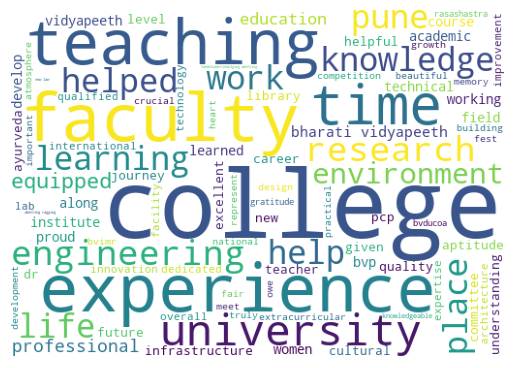

In [8]:
options = ['positive']
 
# selecting rows based on condition
rev_positive= dfrev_for_wc[dfrev_for_wc['sentiment'].isin(options)]

rev_text_final=pd.DataFrame(rev_positive['c1'])
# initializing punctuations string
import string
punc = string.punctuation

# Removing punctuations in string
# Using loop + punctuation string
for ele in punc:
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")
rev_text_final['c1'] = rev_text_final['c1'].str.replace(",", '')
rev_text_final['c1'] = rev_text_final['c1'].str.replace("  ", ' ')

filter_words=[",","'",'good','parts',"many","part","thank","film","despite","make","great","one","enough","thing","without","something","well","every","better","first","two"," s "," s","s "]
for ele in filter_words:
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")

rev_text_wc=rev_text_final['c1']
rev_text_wc.to_csv('PositiveReviews.csv')

#C:/Users/mital/AppData/Local/Temp/ipykernel_16172/3402775723.py -m pip install wordcloud
#!pip install wordcloud

from wordcloud import WordCloud
#Dimensions of word cloud
wordcloud_rotten=WordCloud(background_color='white',width=512,height=360).generate(''.join(rev_text_wc))
#Displaying the word cloud
from matplotlib import pyplot as plt
plt.imshow(wordcloud_rotten)
plt.axis('off')
plt.savefig('WordCloud_Pos')
plt.show()


C:\Users\mital\AppData\Local\Temp\ipykernel_9368\3799074259.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")


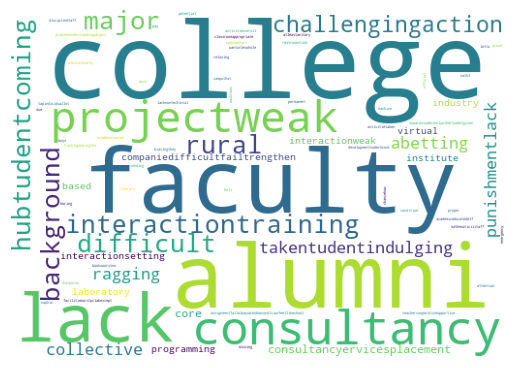

In [9]:
options = ['negative']
 
# selecting rows based on condition
rev_negative= dfrev_for_wc[dfrev_for_wc['sentiment'].isin(options)]

rev_text_final=pd.DataFrame(rev_negative['c1'])
# initializing punctuations string
import string
punc = string.punctuation
# Removing punctuations in string
# Using loop + punctuation string
for ele in punc:
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")
rev_text_final['c1'] = rev_text_final['c1'].str.replace(",", '')
rev_text_final['c1'] = rev_text_final['c1'].str.replace("  ", ' ')

filter_words=[",","'",'good','movies',"hubtudentcoming", "bad","film's","movie","film","despite","make","great","one","enough","thing","without","something","well","every","better","first","two"," s "," s","s "]
for ele in filter_words:
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")

rev_text_wc=rev_text_final['c1']
rev_text_wc.to_csv('NegativeReviews.csv')
#C:/Users/mital/AppData/Local/Temp/ipykernel_16172/3402775723.py -m pip install wordcloud
#!pip install wordcloud

from wordcloud import WordCloud
#Dimensions of word cloud
wordcloud_rotten=WordCloud(background_color='white',width=512,height=360).generate(''.join(rev_text_wc))
#Displaying the word cloud
from matplotlib import pyplot as plt
plt.imshow(wordcloud_rotten)
plt.axis('off')
plt.savefig('WordCloud_Neg')
plt.show()


C:\Users\mital\AppData\Local\Temp\ipykernel_9368\1567520343.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")


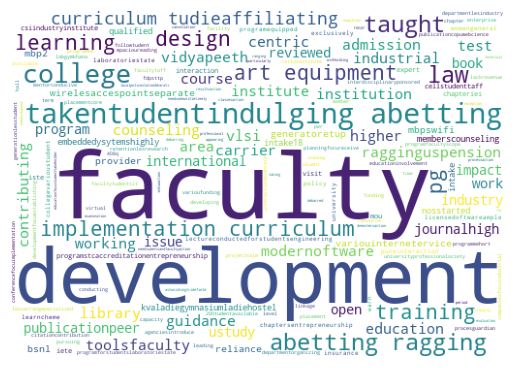

In [10]:
options = ['neutral']
 
# selecting rows based on condition
rev_neutral= dfrev_for_wc[dfrev_for_wc['sentiment'].isin(options)]

rev_text_final=pd.DataFrame(rev_neutral['c1'])
# initializing punctuations string
import string
punc = string.punctuation

# Removing punctuations in string
# Using loop + punctuation string
for ele in punc:
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")
rev_text_final['c1'] = rev_text_final['c1'].str.replace(",", '')
rev_text_final['c1'] = rev_text_final['c1'].str.replace("  ", ' ')

filter_words=[",","'",'good','movies',"takentudentindulging  ","board","movie","film","despite","make","great","one","enough","thing","without","something","well","every","better","first","two"," s "," s","s "]
for ele in filter_words:
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")

rev_text_wc=rev_text_final['c1']
rev_text_wc.to_csv('NeutralReviews.csv')

#C:/Users/mital/AppData/Local/Temp/ipykernel_16172/3402775723.py -m pip install wordcloud
#!pip install wordcloud

from wordcloud import WordCloud
#Dimensions of word cloud
wordcloud_rotten=WordCloud(background_color='white',width=512,height=360).generate(''.join(rev_text_wc))
#Displaying the word cloud
from matplotlib import pyplot as plt
plt.imshow(wordcloud_rotten)
plt.axis('off')
plt.savefig('WordCloud_Neu')
plt.show()

In [11]:
def fun_wordcount(dfrev_for_wc,options,outputfile):
    rev_df= dfrev_for_wc[dfrev_for_wc['sentiment'].isin(options)]
    rev_text_final=pd.DataFrame(rev_df['c1'])
    rev_text_final.reset_index(drop=True,inplace=True)
    
    rev_text_final.reset_index(drop=True,inplace=True)
 
    # initializing punctuations string
    import string
    punc = string.punctuation

    # Removing punctuations in string
    # Using loop + punctuation string
    count_row = rev_text_final.shape[0]
  #  for index, row in rev_text_final.iterrows():
    for i in range(count_row):
        for ele in punc:
            rev_text_final.loc[i, 'c1'] = rev_text_final.loc[i, 'c1'].replace(ele,'')
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(",", '')
    rev_text_final['c1'] = rev_text_final['c1'].str.replace("  ", ' ')

    filter_words=[",","'",'good','parts',"many","part","thank","film","despite","make","great","one","enough","thing","without","something","well","every","better","first","two"," s "," s","s "]
    for ele in filter_words:
        rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")

    rev_text_wc=rev_text_final['c1']
    rev_wordcount=rev_text_final.c1.str.split(expand=True).stack().value_counts()
    rev_wordcount.to_csv(outputfile)
    rev_wordcount


In [12]:
fun_wordcount(dfrev_for_wc,['negative'],'BVCOEW_NegativeWordCount.csv')

In [13]:
fun_wordcount(dfrev_for_wc,['positive'],'BVCOEW_PositiveWordCount.csv')